In [1]:
import scanpy as sc
import torch
import numpy as np
import pinecone
import os
from pinecone import Pinecone, ServerlessSpec
from itertools import islice
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import pandas as pd

In [2]:
roohani_adata = sc.read_h5ad('clean_t_chicken_data_uce_adata.h5ad')

In [3]:
bruthans_adata = sc.read_h5ad('new_esm/clean_t_chicken_data_uce_adata.h5ad')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


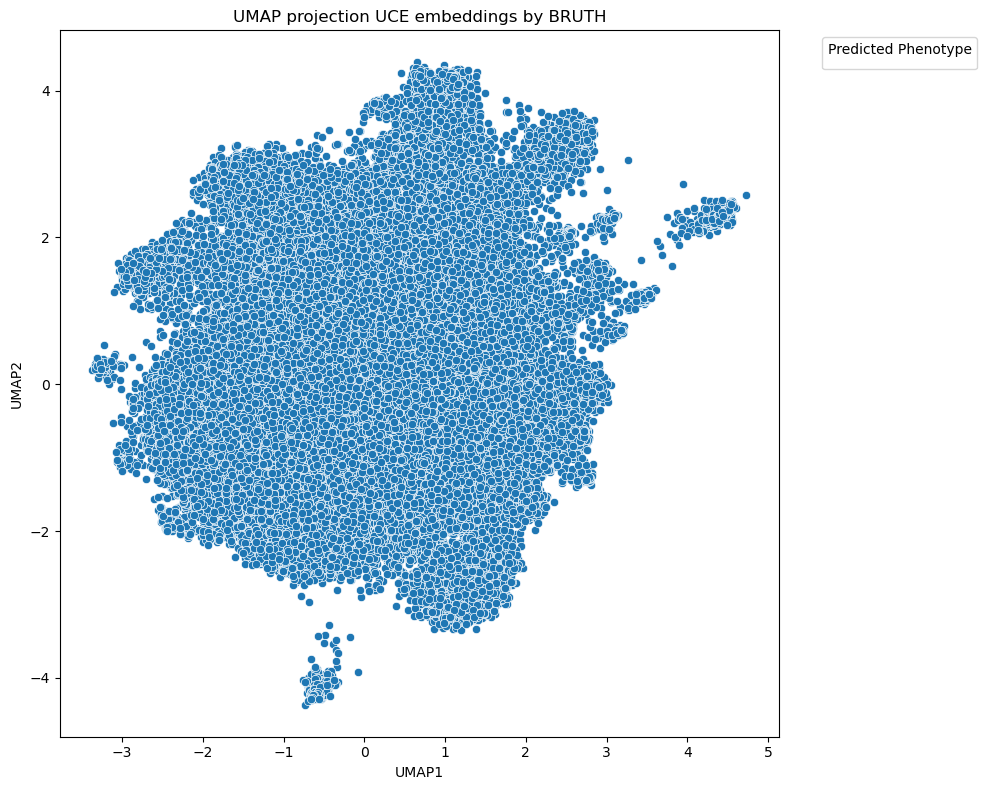

In [4]:
# Assuming `m_adata` is your Anndata object with embeddings in m_adata.obsm["X_uce"] 
# and predicted phenotypes in m_adata.obs["predicted.pheno"]

# Compute UMAP projections for m_adata embeddings
reducer = umap.UMAP()
umap_embeddings_m_adata = reducer.fit_transform(bruthans_adata.obsm["X_uce"])

# Create a DataFrame for m_adata for easier plotting
df_m_adata = pd.DataFrame(umap_embeddings_m_adata, columns=['UMAP1', 'UMAP2'])
#df_m_adata['Predicted Phenotype'] = adata.obs["predicted.pheno"].values

# Ensure distinct non-continuous colors for 'Predicted Phenotype'
# Use a distinct palette like 'Set1', adjusting for the number of unique predicted phenotypes
#palette = sns.color_palette('Set1', n_colors=df_m_adata['Predicted Phenotype'].nunique())

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_m_adata, x='UMAP1', y='UMAP2')

plt.title('UMAP projection UCE embeddings by BRUTH')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Predicted Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


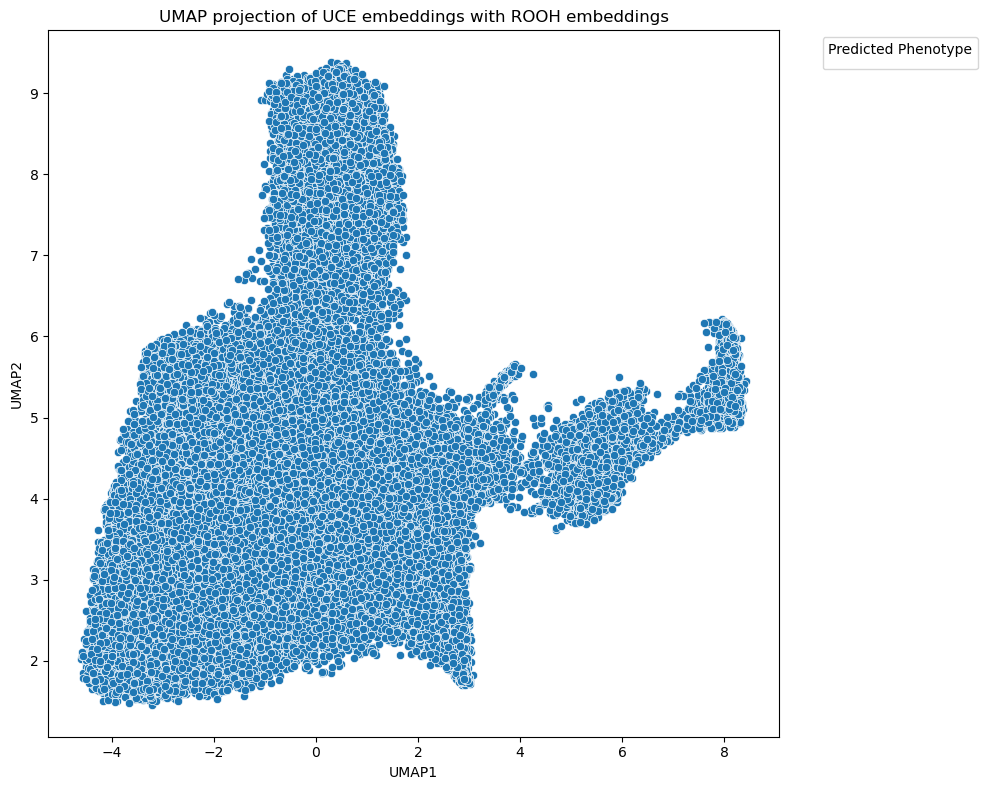

In [5]:
# Assuming `m_adata` is your Anndata object with embeddings in m_adata.obsm["X_uce"] 
# and predicted phenotypes in m_adata.obs["predicted.pheno"]

# Compute UMAP projections for m_adata embeddings
reducer = umap.UMAP()
umap_embeddings_m_adata = reducer.fit_transform(roohani_adata.obsm["X_uce"])

# Create a DataFrame for m_adata for easier plotting
df_m_adata = pd.DataFrame(umap_embeddings_m_adata, columns=['UMAP1', 'UMAP2'])
#df_m_adata['Predicted Phenotype'] = adata.obs["predicted.pheno"].values

# Ensure distinct non-continuous colors for 'Predicted Phenotype'
# Use a distinct palette like 'Set1', adjusting for the number of unique predicted phenotypes
#palette = sns.color_palette('Set1', n_colors=df_m_adata['Predicted Phenotype'].nunique())

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_m_adata, x='UMAP1', y='UMAP2')

plt.title('UMAP projection of UCE embeddings with ROOH embeddings')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Predicted Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


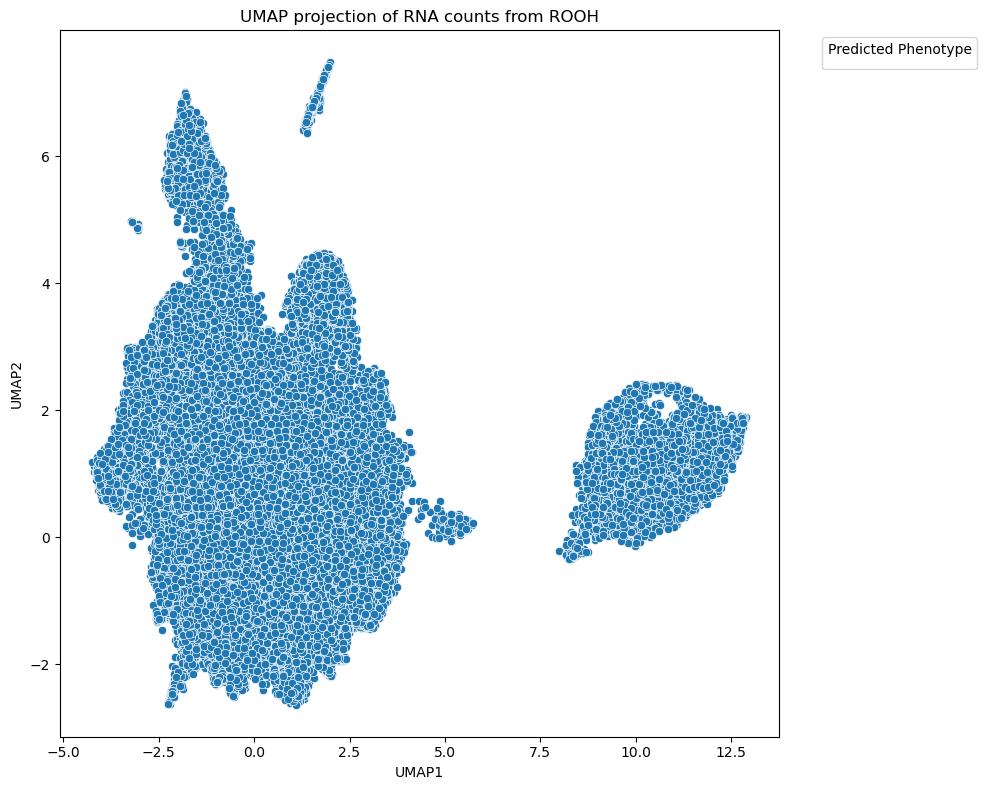

In [6]:
# Assuming `m_adata` is your Anndata object with embeddings in m_adata.obsm["X_uce"] 
# and predicted phenotypes in m_adata.obs["predicted.pheno"]

# Compute UMAP projections for m_adata embeddings
reducer = umap.UMAP()
umap_embeddings_m_adata = reducer.fit_transform(roohani_adata.X)

# Create a DataFrame for m_adata for easier plotting
df_m_adata = pd.DataFrame(umap_embeddings_m_adata, columns=['UMAP1', 'UMAP2'])
#df_m_adata['Predicted Phenotype'] = adata.obs["predicted.pheno"].values

# Ensure distinct non-continuous colors for 'Predicted Phenotype'
# Use a distinct palette like 'Set1', adjusting for the number of unique predicted phenotypes
#palette = sns.color_palette('Set1', n_colors=df_m_adata['Predicted Phenotype'].nunique())

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_m_adata, x='UMAP1', y='UMAP2')

plt.title('UMAP projection of RNA counts from ROOH')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Predicted Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


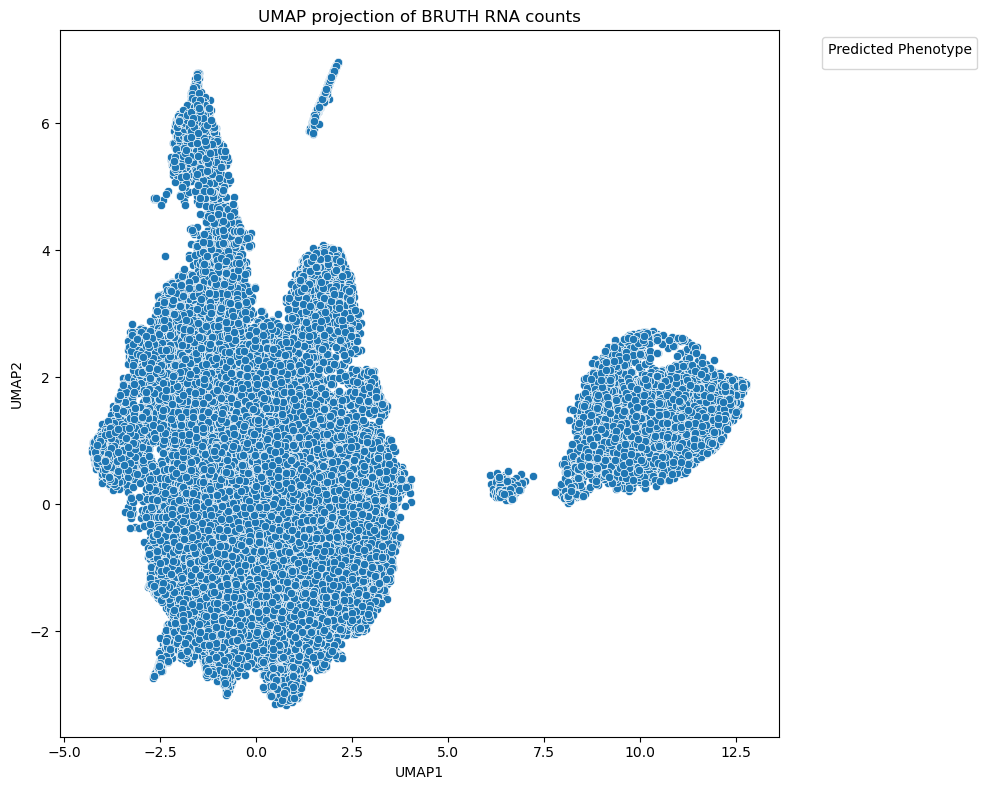

In [7]:
# Assuming `m_adata` is your Anndata object with embeddings in m_adata.obsm["X_uce"] 
# and predicted phenotypes in m_adata.obs["predicted.pheno"]

# Compute UMAP projections for m_adata embeddings
reducer = umap.UMAP()
umap_embeddings_m_adata = reducer.fit_transform(bruthans_adata.X)

# Create a DataFrame for m_adata for easier plotting
df_m_adata = pd.DataFrame(umap_embeddings_m_adata, columns=['UMAP1', 'UMAP2'])
#df_m_adata['Predicted Phenotype'] = adata.obs["predicted.pheno"].values

# Ensure distinct non-continuous colors for 'Predicted Phenotype'
# Use a distinct palette like 'Set1', adjusting for the number of unique predicted phenotypes
#palette = sns.color_palette('Set1', n_colors=df_m_adata['Predicted Phenotype'].nunique())

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_m_adata, x='UMAP1', y='UMAP2')

plt.title('UMAP projection of BRUTH RNA counts')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Predicted Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
r_barcodes = list(roohani_adata.obs.index[:100])
b_barcodes = list(bruthans_adata.obs.index[:100])
r_embs = list(roohani_adata.obsm['X_uce'][:100])
b_embs = list(bruthans_adata.obsm['X_uce'][:100])

In [33]:
r_b2e = dict(zip(r_barcodes, r_embs))
b_b2e = dict(zip(b_barcodes, b_embs))

In [38]:
def insert_protein_embeddings_into_pinecone(r_b2e):
    # Ensure embeddings is a numpy array and has the correct shape
    # if not isinstance(embeddings, np.ndarray) or embeddings.ndim != 2:
    #     raise ValueError("embeddings must be a 2D numpy array")
    
    # Set up Pinecone
    pinecone_api_key = os.getenv('PINECONE_API_KEY')
    pc = Pinecone(api_key=pinecone_api_key)

    # Specify your Pinecone index name
    index_name = 'uce-barcodes'

    # Connect to your Pinecone index
    index = pc.Index(name=index_name)
    
    # Prepare the data for insertion
    vectors = [(str(idx), r_b2e[idx]) for idx in r_b2e.keys()]
    
    # Insert the embeddings into Pinecone
    index.upsert(vectors=vectors)
    
    print("UCE embeddings inserted into Pinecone successfully.")


In [39]:
insert_protein_embeddings_into_pinecone(r_b2e)

UCE embeddings inserted into Pinecone successfully.


In [67]:
def find_similar_embeddings(number):
    embedding = bruthans_adata.obsm["X_uce"][number]
    # Set up Pinecone
    pinecone_api_key = os.getenv('PINECONE_API_KEY')
    pc = Pinecone(api_key=pinecone_api_key)

    # Specify your Pinecone index name
    index_name = 'uce-barcodes'
    
    # Ensure the index exists
    if index_name not in pc.list_indexes().names():
        raise ValueError(f"Index {index_name} does not exist. Please create the index before querying.")
    
    # Connect to your Pinecone index
    index = pc.Index(name=index_name)
    
    # Query the index for the 5 most similar embeddings
    query_result = index.query(vector=[embedding.tolist()], top_k=5)
    
    # Extract the IDs of the most similar embeddings
    similar_ids = [match["id"] for match in query_result["matches"]]

    similar_nums = []
    
    for id in similar_ids:
        similar_nums.append(roohani_adata.obs_names.get_loc(id))
    return similar_nums        



In [70]:
find_similar_embeddings(0)

[55, 62, 74, 38, 29]

In [71]:
#So UCE embeddings generated with Roohani ESM embeddings don't seem to correspond to those generated with Bruth ESM embeddings

In [ ]:
UMAP Rooh+bruth, new UCE embeddings with same ESM

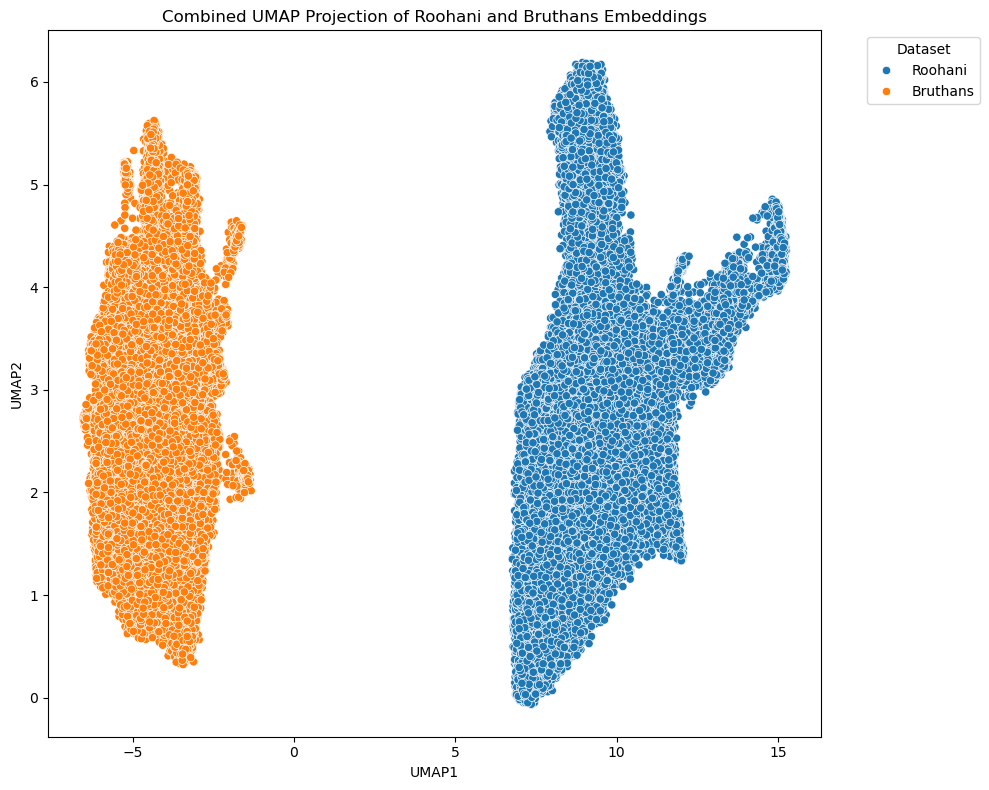

In [72]:
# Combine embeddings from both datasets
embeddings_combined = np.vstack((roohani_adata.obsm["X_uce"], bruthans_adata.obsm["X_uce"]))

# Compute UMAP projections on the combined embeddings
reducer = umap.UMAP()
umap_embeddings_combined = reducer.fit_transform(embeddings_combined)

# Create a DataFrame for easier plotting
df_combined = pd.DataFrame(umap_embeddings_combined, columns=['UMAP1', 'UMAP2'])

# Add a column to indicate the source dataset
df_combined['Source'] = ['Roohani'] * len(roohani_adata.obsm["X_uce"]) + ['Bruthans'] * len(bruthans_adata.obsm["X_uce"])

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_combined, x='UMAP1', y='UMAP2', hue='Source')

plt.title('Combined UMAP Projection of Roohani and Bruthans Embeddings')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#it would seem roohani and bruthans embeddings are separated in space, but is that really the case?

In [74]:
modified_b_b2e = {'bruth_' + k: v for k, v in b_b2e.items()} 

In [75]:
modified_b_b2e

{'bruth_ChickenE12S1_AAACCTGAGAACAACT-1': array([-0.02526727, -0.04600465, -0.03157077, ..., -0.00083144,
        -0.01222447,  0.05807173], dtype=float32),
 'bruth_ChickenE12S1_AAACCTGAGAACTGTA-1': array([ 0.00447112, -0.02589496,  0.00551414, ...,  0.01098227,
        -0.01743631,  0.05437501], dtype=float32),
 'bruth_ChickenE12S1_AAACCTGAGATCCCAT-1': array([-0.01401972, -0.02703178,  0.00332801, ...,  0.00798547,
         0.00818961,  0.02827747], dtype=float32),
 'bruth_ChickenE12S1_AAACCTGAGCAGGTCA-1': array([-0.00621102, -0.02801869,  0.03622695, ..., -0.03181992,
        -0.02332979,  0.05073123], dtype=float32),
 'bruth_ChickenE12S1_AAACCTGAGCGATAGC-1': array([-0.03294003, -0.04954442,  0.00062461, ..., -0.01677633,
        -0.04042492,  0.01640918], dtype=float32),
 'bruth_ChickenE12S1_AAACCTGAGCGTAGTG-1': array([-0.01872201, -0.05328962, -0.02407557, ..., -0.02059288,
        -0.01142111,  0.05892959], dtype=float32),
 'bruth_ChickenE12S1_AAACCTGAGGAGTTGC-1': array([ 4.630738

In [76]:
insert_protein_embeddings_into_pinecone(modified_b_b2e)

UCE embeddings inserted into Pinecone successfully.


In [82]:
def find_similar_embeddings(number):
    embedding = roohani_adata.obsm["X_uce"][number]
    # Set up Pinecone
    pinecone_api_key = os.getenv('PINECONE_API_KEY')
    pc = Pinecone(api_key=pinecone_api_key)

    # Specify your Pinecone index name
    index_name = 'uce-barcodes'
    
    # Ensure the index exists
    if index_name not in pc.list_indexes().names():
        raise ValueError(f"Index {index_name} does not exist. Please create the index before querying.")
    
    # Connect to your Pinecone index
    index = pc.Index(name=index_name)
    
    # Query the index for the 5 most similar embeddings
    query_result = index.query(vector=[embedding.tolist()], top_k=5)
    
    # Extract the IDs of the most similar embeddings
    similar_ids = [match["id"] for match in query_result["matches"]]

    return similar_ids      


In [83]:
find_similar_embeddings(3)

['ChickenE12S1_AAACCTGAGCAGGTCA-1',
 'ChickenE12S1_AAACCTGTCGCCTGTT-1',
 'ChickenE12S1_AAAGATGCATGCCTTC-1',
 'ChickenE12S1_AAACGGGTCACGCATA-1',
 'ChickenE12S1_AAACCTGTCACAGGCC-1']

In [ ]:
#Yes, they really are totally separated in the UCE space